In [1]:
import matplotlib.pyplot as mpl
import mpl_utils as mut
import numpy as np

In [2]:
import matplotlib.pyplot as mpl
import numpy as np
import mpl_utils as mut
mut.config_plot()

In [12]:
π = np.pi
two_π = 2.0 * π
ga = 9.8
rho_w = 1025.0

In [13]:
ζ_tid = 6.75
H_rat = 5.6
S_bas = 22.0 * 1000.0**2

In [14]:
QT = 200.0
n = 20
sum_QT = n * QT

In [15]:
Qs = 600.0
m = 8
sum_Qs = m * Qs

G_ε = sum_Qs / np.sqrt( 2.0 * ga * ζ_tid ) + sum_QT / np.sqrt( 2.0 * ga * H_rat )

Power = 138.37 MW
Max P(t) = 387.87 MW
Cap factor = 0.36


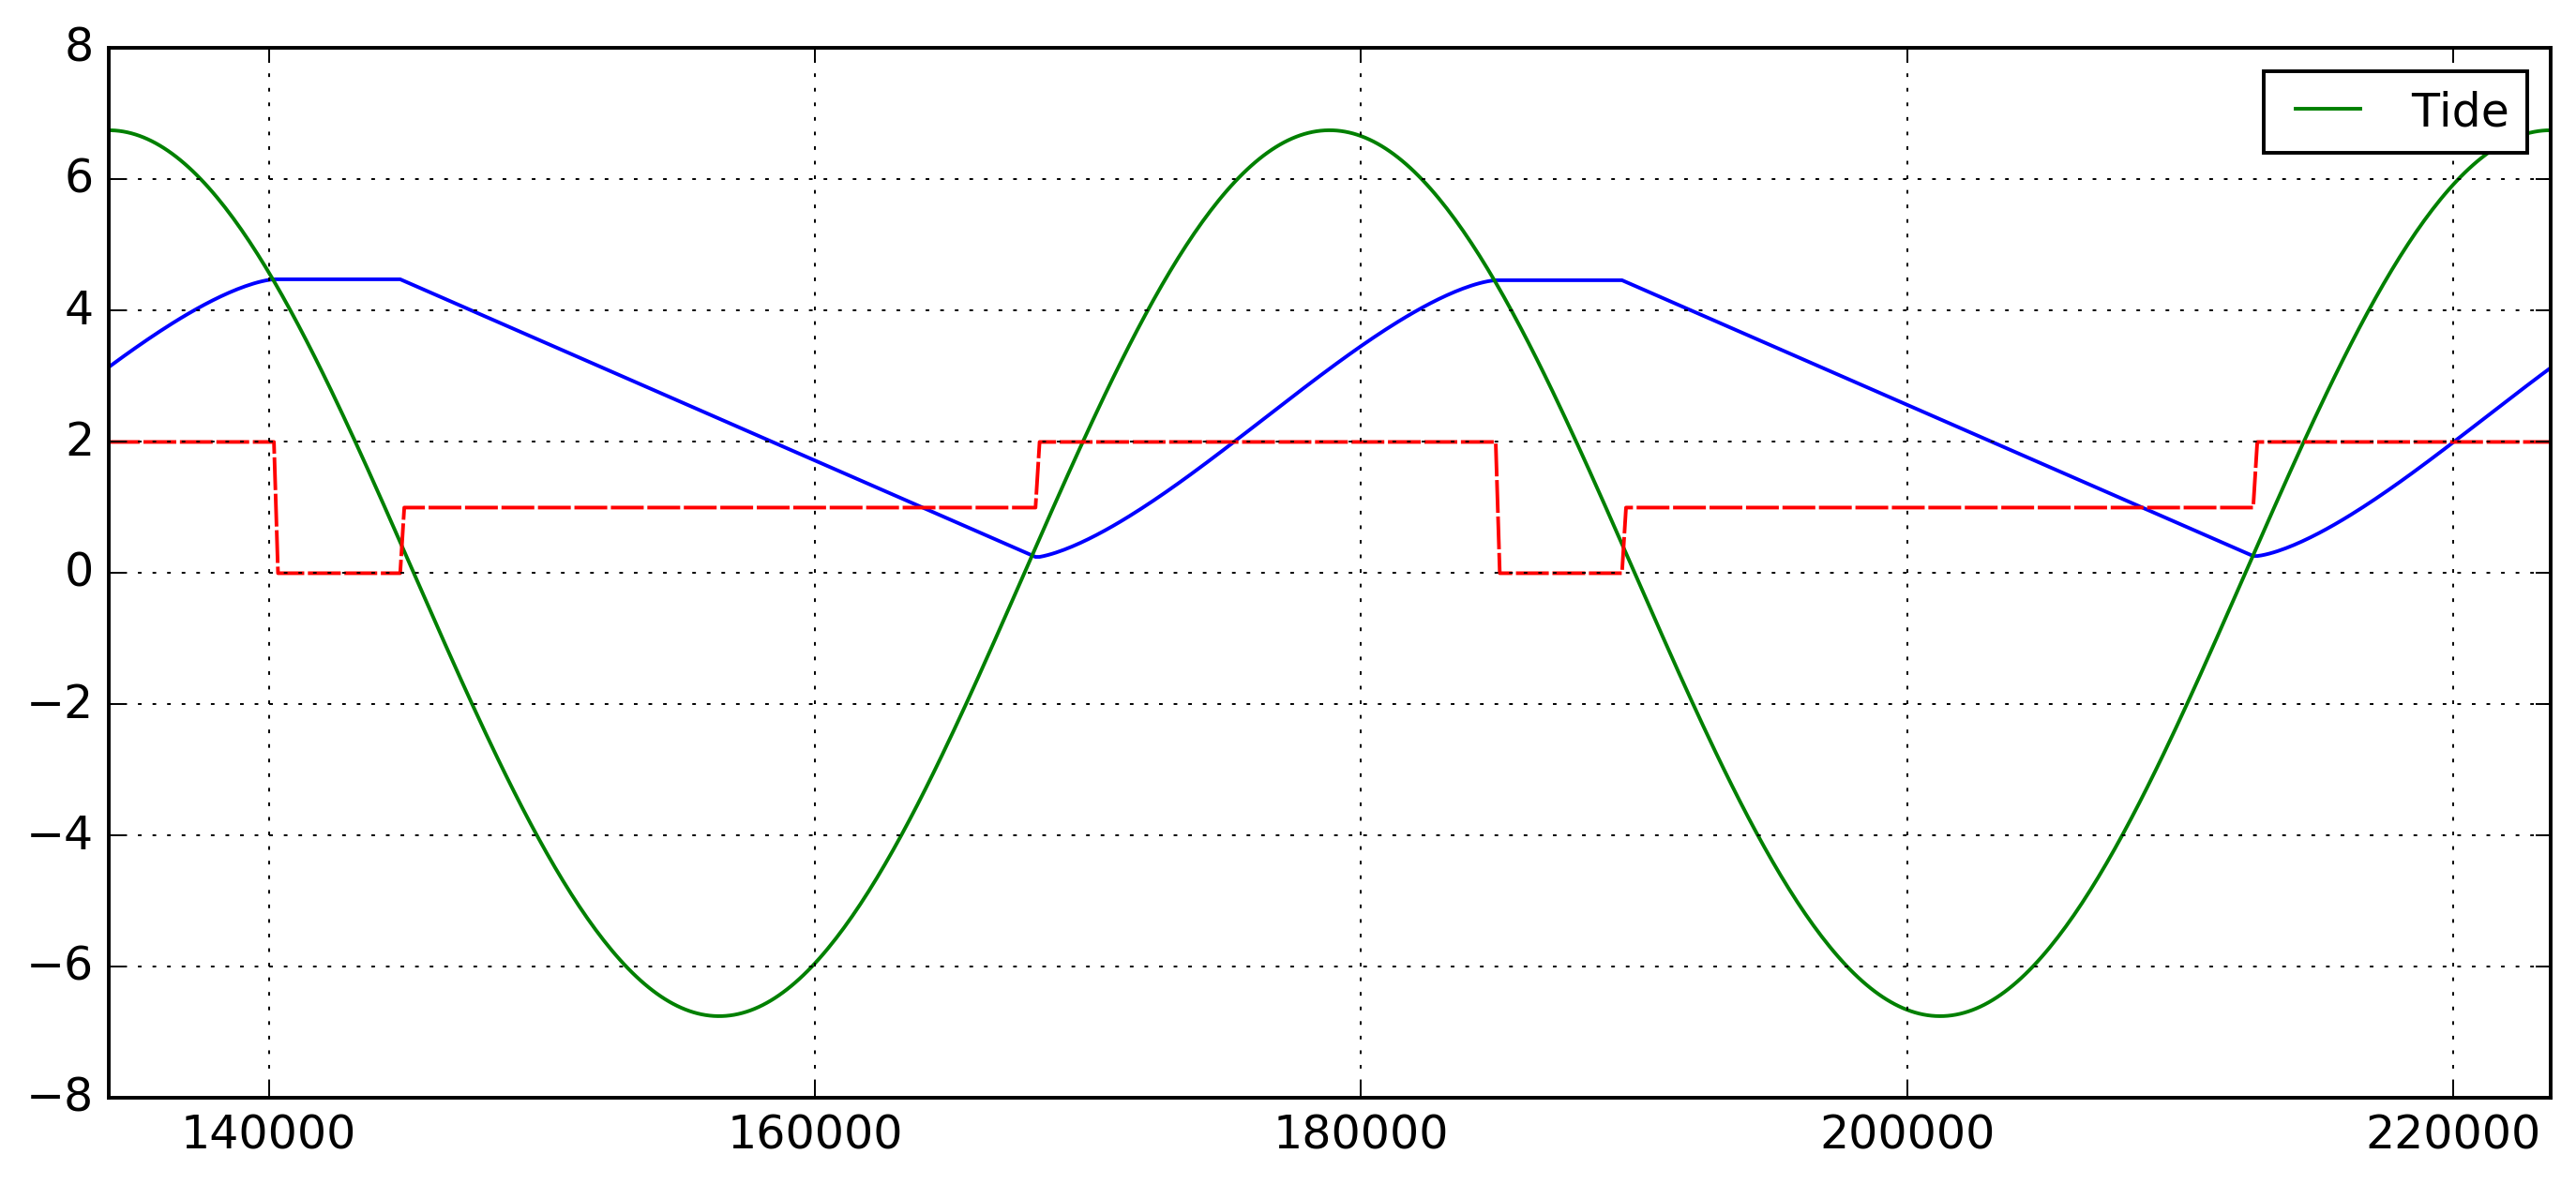

In [16]:
Per = 12.0*3600.0 + 25.2*60.0
kp = 5 # number of periods

# time points
t_vec  = np.linspace( 0.0, kp*Per, kp*300 )
delta_t = t_vec[1] - t_vec[0]
Te = 0.0
T1 = t_vec[-1]

# the tidel level
y_vec = ζ_tid * np.cos( two_π * t_vec / Per )

# initial control stage
u = 0
u_vec = np.zeros( t_vec.size )

# instantaneous power
P_vec = np.zeros( t_vec.size )

# volume vector
V_vec = np.zeros( t_vec.size )

# flow rate vector
Q_vec = np.zeros( t_vec.size )

# initial condition
V_vec[0] = S_bas * 5.0#y_vec[0]

# minimum h for turbine starting
h_min = 4

for i, t in enumerate( t_vec[:-1] ): 
  z0 = V_vec[i] / S_bas 
  h = z0 - y_vec[i]
  
  #__STAGE 0_________________________
  if u == 0:
    if h > 0.0 and h > h_min: 
      u = 1
      Q = sum_QT
      E = 0.0
    else:
      Q = 0.0
  
  #__STAGE 1_________________________
  elif u == 1:
    if h <= 0.0:
      Q = 0.0
      u = 2
    else:
      Q = sum_QT      
      
  #__STAGE 2_________________________
  elif u == 2:
    if h >= 0.0:
      Q = 0.0
      u = 0
    else:
      Q = -G_ε*np.sqrt( 2.0*ga*np.abs(h) )
      
  #__________________________________
  if u == 1:
    P_vec[i+1] = rho_w * ga * h * Q
      
  u_vec[i+1] = u
  V_vec[i+1] = V_vec[i] - delta_t * Q

P_avg = np.mean(P_vec) / 1E6
P_max = np.max( P_vec) / 1E6
C_fac = P_avg / P_max

print( "Power = %.2f MW" % P_avg ) 
print( "Max P(t) = %.2f MW" % P_max ) 
print( "Cap factor = %.2f" % C_fac ) 

mpl.plot( t_vec, V_vec/S_bas )
mpl.plot( t_vec, y_vec, label='Tide' )
mpl.plot( t_vec, u_vec, dashes=(9,1) )
mpl.legend()
mpl.grid()
mpl.xlim( 3*Per, 5*Per );

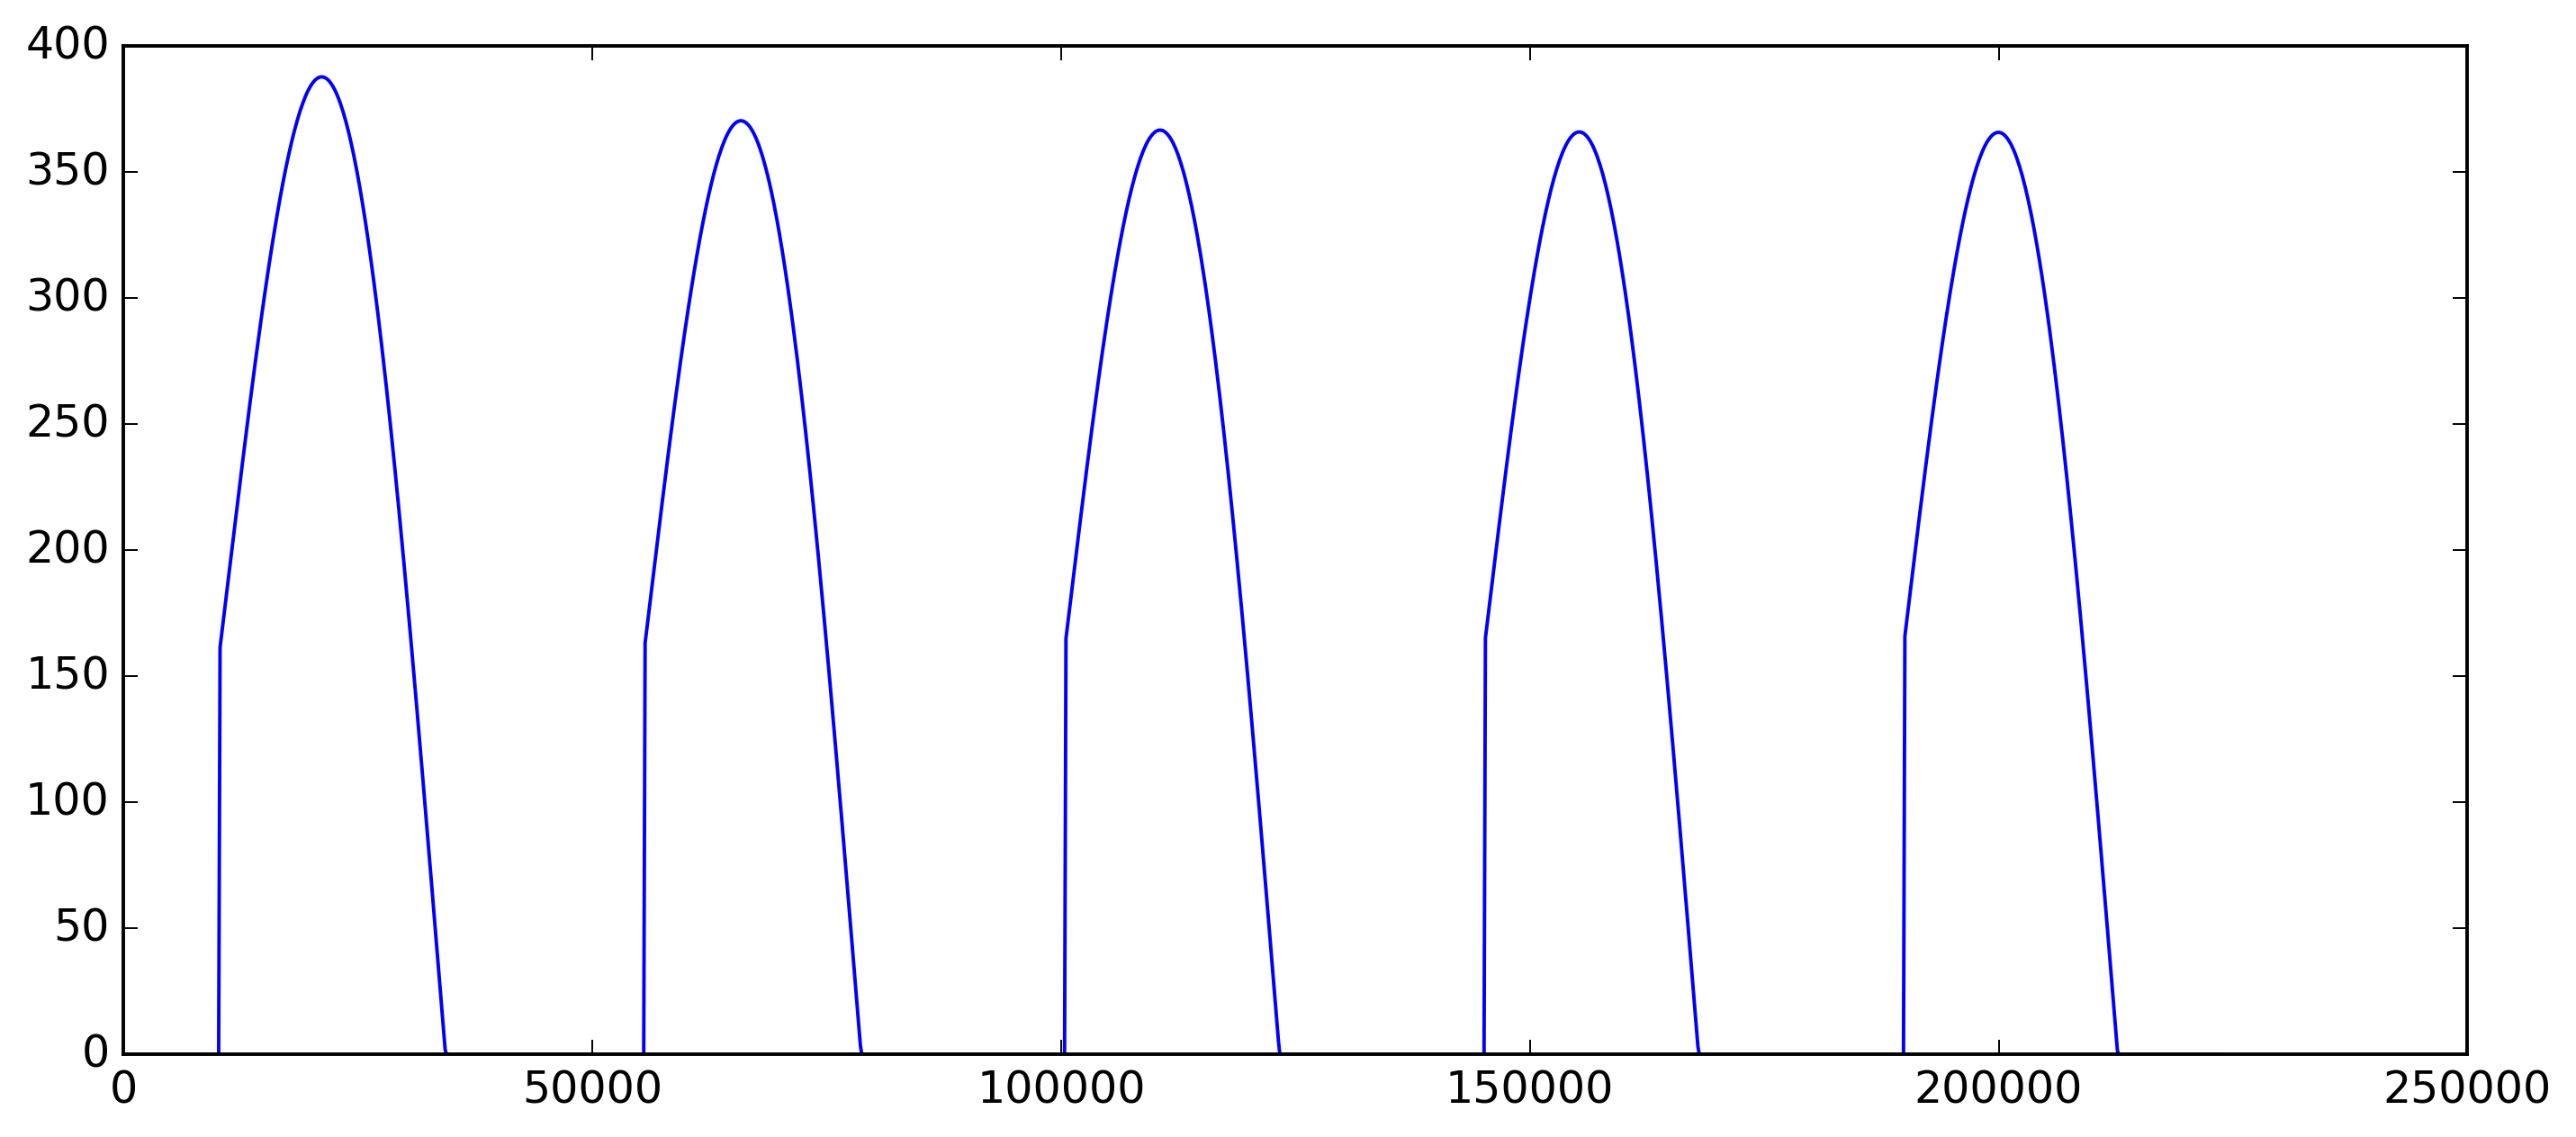

In [8]:
mpl.plot( t_vec, P_vec/1e6 )

In [11]:
sum_Qs

4800.0